In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import re

 
from sklearn.model_selection import KFold

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import RepeatedKFold, GridSearchCV, cross_val_score

from sklearn.ensemble import BaggingRegressor, StackingRegressor, VotingRegressor

from numpy import mean
import scipy
import numpy as np

import warnings 
warnings.filterwarnings('ignore')

In [2]:
available_ip = pd.read_csv('available_input.csv')
available_ip = available_ip.drop(available_ip.columns[0], axis=1)
available_op = pd.read_csv('available_output.csv')
available_op = available_op.drop(available_op.columns[0], axis = 1)
available_ip

Year  Month  Count  average_high_celsius  daily_mean_celsius  \
0     2010      1   54.0                  17.5                 8.1   
1     2010      2   54.0                  18.1                 8.3   
2     2010      3   54.0                  23.4                10.2   
3     2010      4   14.0                  22.7                12.1   
4     2010      5   14.0                  26.8                14.8   
...    ...    ...    ...                   ...                 ...   
1831  2022      5   21.0                  26.8                14.8   
1832  2022      6   21.0                  28.7                17.6   
1833  2022      7   21.0                  33.1                19.5   
1834  2022      8   21.0                  30.6                19.2   
1835  2022      9   21.0                  27.6                17.0   

      average_low_celsius  average_precipitation_mm  \
0                     5.3                       2.4   
1                     5.3                       2.3   
2                     6.8                       3.4   
3                     8.3                       4.6   
4                    10.9                       6.9   
...                   ...                       ...   
1831                 10.9                       6.9   
1832                 13.6                       9.6   
1833                 15.6                      11.7   
1834                 15.3                      11.5   
1835                 13.4                       9.8   

      average_precipitation_days  average_relative_hummidity  Country_Belgium  \
0                          -15.6                        62.6                1   
1                          -13.4                        48.8                1   
2                           -9.8                        52.7                1   
3                           -7.2                        54.1                1   
4                           -5.6                        59.5                1   
...                          ...                         ...              ...   
1831                        -5.6                        59.5                0   
1832                        -0.7                        66.7                0   
1833                         1.8                        56.2                0   
1834                         0.6                        73.3                0   
1835                        -1.7                        59.5                0   

      ...  Country_Germany  Country_Italy  Country_Netherlands  \
0     ...                0              0                    0   
1     ...                0              0                    0   
2     ...                0              0                    0   
3     ...                0              0                    0   
4     ...                0              0                    0   
...   ...              ...            ...                  ...   
1831  ...                0              0                    0   
1832  ...                0              0                    0   
1833  ...                0              0                    0   
1834  ...                0              0                    0   
1835  ...                0              0                    0   

      Country_Poland  Country_Portugal  Country_Spain  Country_Switzerland  \
0                  0                 0              0                    0   
1                  0                 0              0                    0   
2                  0                 0              0                    0   
3                  0                 0              0                    0   
4                  0                 0              0                    0   
...              ...               ...            ...                  ...   
1831               0                 0              0                    0   
1832               0                 0              0                    0   
1833               0                

In [ ]:
c_range = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 50, 60]
X_Train,X_Test,y_Train,y_Test = train_test_split(available_ip,available_op,test_size = 0.2)
mean_error = []; mse_temp = [];  std_error = []
for C in c_range:
    lasso_model = linear_model.Lasso(alpha = 1/(2*C))
    lasso_model.fit(X_Train, y_Train)
    ypred = lasso_model.predict(X_Test)
    mse = mean_squared_error(y_Test, ypred)
    mse_temp.append(mse)
    mean_error.append(np.array(mse_temp).mean())
    std_error.append(np.array(mse_temp).std())
plt.errorbar(c_range, mean_error, yerr=std_error)
plt.xlabel('C')
plt.ylabel('Mean square error')
plt.title('Lasso regression C vs MSE(C=[ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 50, 60 ])')
plt.legend(['Standard deviation'])
plt.show()

In [ ]:
def fitting_models_CV():
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    LR_Model = LinearRegression()
    LS_Model = Lasso(alpha = 1/(2*10))
    R_Model = Ridge(alpha=1.5)
    DT_Model = DecisionTreeRegressor(max_depth=50)
    RFT_Model = RandomForestRegressor()
    GBR_Model = GradientBoostingRegressor()
    KNR_Model = KNeighborsRegressor(n_neighbors=20)
    ALL_Model = [('Linear Regression', LR_Model),
        ('Lasso', LS_Model),
        ('Ridge', R_Model),
        ('Decision Tree', DT_Model),
        ('Random Forest', RFT_Model),
        ('Gradient Boosting', GBR_Model),
        ('KNearest Neighbor',KNR_Model)       
    ]
    for name_of_model, model in ALL_Model:
        scores = cross_val_score(model, available_ip, available_op, cv=cv) 
        #rg.fit(X_train,y_train)
        #pred = rg.predict(X_test)
        score = format(mean(scores), '.4f')
        print("{} : {}".format(name_of_model, score))

In [ ]:
fitting_models_CV()

# GradientBoostingRegressor

In [ ]:


scores = []

for each_outer in range(0,10):
    for each_inner in range(0,10):
        X_train, X_test, y_train, y_test = train_test_split(available_ip, available_op, test_size = 0.3)
        reg = GradientBoostingRegressor(max_depth=5, n_estimators=100)
        reg.fit(X_train, y_train)

        reg.predict(X_test)
        accuracy = reg.score(X_test, y_test)
        scores.append(accuracy)
    
    print(str(each_outer) + ' --> ' + str(mean(scores)))

# LinearRegression

In [ ]:
scores = []

for each_outer in range(0,10):
    for each_inner in range(0,10):
        X_train, X_test, y_train, y_test = train_test_split(available_ip, available_op, test_size = 0.3)
        reg = LinearRegression()
        reg.fit(X_train, y_train)

        reg.predict(X_test)
        accuracy = reg.score(X_test, y_test)
        scores.append(accuracy)
    
    print(str(each_outer) + ' --> ' + str(mean(scores)))

# Lasso

In [ ]:
scores = []

for each_outer in range(0,10):
    for each_inner in range(0,10):
        X_train, X_test, y_train, y_test = train_test_split(available_ip, available_op, test_size = 0.3)
        reg = Lasso(alpha = 1/(2*10))
        reg.fit(X_train, y_train)

        reg.predict(X_test)
        accuracy = reg.score(X_test, y_test)
        scores.append(accuracy)
    
    print(str(each_outer) + ' --> ' + str(mean(scores)))

# DecisionTreeRegressor

In [ ]:
scores = []

for each_outer in range(0,10):
    for each_inner in range(0,10):
        X_train, X_test, y_train, y_test = train_test_split(available_ip, available_op, test_size = 0.3)
        reg = DecisionTreeRegressor(max_depth=100)
        reg.fit(X_train, y_train)

        reg.predict(X_test)
        accuracy = reg.score(X_test, y_test)
        scores.append(accuracy)
    
    print(str(each_outer) + ' --> ' + str(mean(scores)))

# RandomForestRegressor

In [ ]:
scores = []

for each_outer in range(0,10):
    for each_inner in range(0,10):
        X_train, X_test, y_train, y_test = train_test_split(available_ip, available_op, test_size = 0.3)
        reg = RandomForestRegressor()
        reg.fit(X_train, y_train)

        reg.predict(X_test)
        accuracy = reg.score(X_test, y_test)
        scores.append(accuracy)
    
    print(str(each_outer) + ' --> ' + str(mean(scores)))

# KNeighborsRegressor(n_neighbors=20)

In [ ]:
scores = []

for each_outer in range(0,10):
    for each_inner in range(0,10):
        X_train, X_test, y_train, y_test = train_test_split(available_ip, available_op, test_size = 0.3)
        reg = KNeighborsRegressor(n_neighbors=10)
        reg.fit(X_train, y_train)

        reg.predict(X_test)
        accuracy = reg.score(X_test, y_test)
        scores.append(accuracy)
    
    print(str(each_outer) + ' --> ' + str(mean(scores)))

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=1)#, random_state=1)
reg_bg = BaggingRegressor(base_estimator=GradientBoostingRegressor(max_depth=5, n_estimators=100),
                        n_estimators=20, random_state=0)
scores = cross_val_score(reg_bg, available_ip, available_op, cv=cv)
score = format(mean(scores), '.4f')
print(score)

In [3]:


X = available_ip.values
y = available_op.values




In [4]:
def calculate_mse_stddev_penalty_lasso(penalty_parameters) : 

    k_fold_split = 5

    k_fold_split_function =  KFold(n_splits = k_fold_split)

    mean_sqaure_error_penalty = []
    standard_deviation_penalty = []

    for penalty in penalty_parameters : 
        lasso_model = linear_model.Lasso(alpha = 1 / (2 * penalty))
        
        mean_sqaure_error_fold = []
        for train_index, test_index in k_fold_split_function.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            lasso_model.fit(X_train, y_train)
            predictions = lasso_model.predict(X_test)
            
            mean_sqaure_error_fold.append(mean_squared_error(y_test, predictions))

        mean_sqaure_error_penalty.append(np.array(mean_sqaure_error_fold).mean())
        standard_deviation_penalty.append(np.array(mean_sqaure_error_fold).std())
        
    return mean_sqaure_error_penalty, standard_deviation_penalty


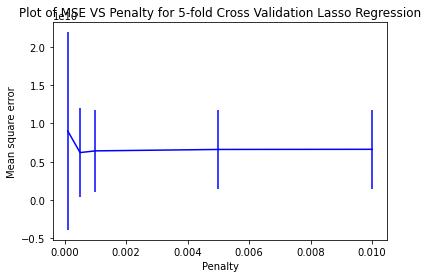

In [5]:
penalty_parameters = [0.0001, 0.0005, 0.001, 0.005, 0.01]

mean_sqaure_error, standard_deviation = calculate_mse_stddev_penalty_lasso(penalty_parameters)

plt.figure()
plt.errorbar(penalty_parameters, mean_sqaure_error, yerr = standard_deviation, color = 'blue')
plt.xlabel('Penalty')
plt.ylabel('Mean square error')
plt.title('Plot of MSE VS Penalty for 5-fold Cross Validation Lasso Regression')
plt.show()

In [7]:

X_Train,X_Test,y_Train,y_Test = train_test_split(available_ip,available_op,test_size = 0.2)


In [11]:
print(len(X_Train.columns))
feature_names = list(X_Train.columns.values)
feature_names.insert(0, 'Penalty')
feature_names.insert(1, 'Intercept')

21


In [10]:
penalty_parameters = [0.0001, 0.0005, 0.001, 0.005, 0.01]

In [12]:
lasso_model_dictionary = {}

lasso_model_params_df = pd.DataFrame(columns = feature_names)
lasso_model_equation_df = pd.DataFrame(columns = ['Penalty', 'Model Equation'])
for penalty in penalty_parameters:
    lasso_model = Lasso(alpha = 1 / (2 * penalty))
    lasso_model.fit(X_Train, y_Train)
    
    model_dict = {}
    model_dict['Penalty'] = penalty
    model_dict['Intercept'] = [np.around(lasso_model.intercept_, decimals = 3)]
    for i in range(2,23) :
        model_dict[feature_names[i]] = [np.around(lasso_model.coef_[i-2], decimals = 3)]
    
    lasso_model_params_df = lasso_model_params_df.append(model_dict, ignore_index = True)
    
    model_eq_dict = {}
    model_eq_dict['Penalty'] = penalty
    equation_string = ''
    for i in range(2,23) :
        coeff = np.around(lasso_model.coef_[i-2], decimals = 3)
        if coeff != 0 : 
            equation_string += '(' + str(coeff) + ')' + ' * ' + feature_names[i] + ' + '
    
    equation_string += '(' + str(np.around(lasso_model.intercept_, decimals = 3)) + ')'
    model_eq_dict['Model Equation'] = equation_string
    
    lasso_model_equation_df = lasso_model_equation_df.append(model_eq_dict, ignore_index = True)
    
    lasso_model_dictionary[penalty] = lasso_model

lasso_model_params_df = lasso_model_params_df.style.applymap(lambda x:'white-space:nowrap')
display(lasso_model_params_df)

lasso_model_equation_df = lasso_model_equation_df.style.set_properties(**{'text-align': 'left'})
lasso_model_equation_df = lasso_model_equation_df.applymap(lambda x:'white-space:nowrap')
display(lasso_model_equation_df)